In [ ]:
!pip install pandas
import pandas as pd

**BYREDO REVIEWS**

In [ ]:
#Создаем датафрейм из файла с отзывами.

df = pd.read_csv("byredo_all.csv")


In [ ]:
# Выгружаем столбец с текстами отзывов в список, чтобы прогнать его через модуль dostoevsky
reviews = df['review body'].tolist()

In [ ]:
# Проверим. Всё получилось.
print(reviews[0:2])
len(reviews)

['Очень странно, что на этот наикрасивейший аромат не отзывов!Аромат прямо солнечный, очень звонкий,незамеченным остаться просто нет шансов. Пачули здесь не такие громкие, есть сладость и глубина одновременно. Брала 3 мл на знакомство - очень хочу больше теперь. Женщинам подойдет однозначно, но на мужчине тоже представляю -не оттолкнет, допускаю, что сладости будет меньше.', 'Сладкая ёлочка, новый год, свежо и приятно! Через время появляется какая-то чуть-чуть тяжеленькая мужская нотка , может мускус? И чуть-чуть химозность,но как-то ненавязчиво, ведь иначе вы будете благоухать пихтовым лесоповалом.))) Не в театр, в офис -да. К одежде классического и спортивного стиля. Только что купила, мне кажется не для жары. По ноткам ,пожалуй, да , совпадает с заявленным. Только не понимаю как пахнет песок. ))) Мне оч нравится!']


4739

*Характеристика аннотаций dostoevsky*

Highlights of our annotation policy:

* **negative** and **positive** sentiment classes cover both implicit and explicit sentiment, both for expressing emotion and attitudes;

* **neutral** class (unmarked for sentiment);

* **speech** act class: social media posts often include formulaic greetings, thank-you posts and congratulatory posts, which may or may not express the actual sentiment of the sender;

* "**skip**" class for unclear cases, noisy posts, content that was likely not created by the users themselves (poems, lyrics, jokes etc.).

* cases of mixed sentiment are annotated for the dominant sentiment of the post, and the guidelines cover 6 frequent cases of mixed sentiment to improve inter-annotator agreement;

* hashtags and smileys are not treated as automatic sentiment labels.



In [ ]:
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=1d051ef941d4191c4e16ca10cf67e5a19b66ee963a29c020a46574b410fc4750
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(reviews, k=2)
list_results = []
for sentiment in results:
  sent_keys = list(sentiment.keys())
  sent_values = list(sentiment.values())
  list_results.append([sent_keys[0], sent_values[0], sent_keys[1], sent_values[1]])

In [ ]:
df_sent = pd.DataFrame(list_results, columns=['label1', 'value1', 'label2', 'value2'])
df_sent

,label1,value1,label2,value2
0,positive,0.348655,negative,0.206904
1,positive,0.287778,negative,0.217348
2,neutral,0.314061,positive,0.268951
3,negative,0.334599,neutral,0.327678
4,neutral,0.320831,negative,0.275140
...,...,...,...,...
4734,negative,0.275140,positive,0.250923
4735,neutral,0.392347,negative,0.245095
4736,neutral,0.672342,negative,0.287778
4737,negative,0.281416,neutral,0.228166


In [ ]:
df = df.join(df_sent)
df

,Unnamed: 0,fragrance,date,user ID,review body,label1,value1,label2,value2
0,0,Oliver Peoples Champagne Byredo для мужчин и ж...,04/15/17 05:59,194615,"Очень странно, что на этот наикрасивейший аром...",positive,0.348655,negative,0.206904
1,1,Oliver Peoples Green Byredo для мужчин и женщин,12/07/20 04:09,275352,"Сладкая ёлочка, новый год, свежо и приятно! Че...",positive,0.287778,negative,0.217348
2,2,Oliver Peoples Green Byredo для мужчин и женщин,02/05/19 03:08,166686,"Мне вот интересно, люди, что отмечают в слышим...",neutral,0.314061,positive,0.268951
3,3,Oliver Peoples Indigo Byredo для мужчин и женщин,09/27/23 10:51,171839,Мне тоже напомнил что-то из Мюглера. Не что-то...,negative,0.334599,neutral,0.327678
4,4,Oliver Peoples Indigo Byredo для мужчин и женщин,04/17/22 08:02,200288,"Отвал башки, самородок ! Я не понимаю как можн...",neutral,0.320831,negative,0.275140
...,...,...,...,...,...,...,...,...,...
4734,4734,Seven Veils Byredo для мужчин и женщин,02/23/17 12:59,189703,Я считаю этот парфюм из разряда убойных. Носит...,negative,0.275140,positive,0.250923
4735,4735,Seven Veils Byredo для мужчин и женщин,09/02/12 19:13,54825,Сначала не понравился: формалин сменяется жест...,neutral,0.392347,negative,0.245095
4736,4736,Seven Veils Byredo для мужчин и женщин,04/01/18 05:33,207485,Лично я в этом аромате не слышу ни какой морко...,neutral,0.672342,negative,0.287778
4737,4737,Seven Veils Byredo для мужчин и женщин,06/16/18 13:11,209182,Гвоздика со специевой морковкой на мне и ванил...,negative,0.281416,neutral,0.228166


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,fragrance,date,user ID,review body,label1,value1,label2,value2
0,Oliver Peoples Champagne Byredo для мужчин и ж...,04/15/17 05:59,194615,"Очень странно, что на этот наикрасивейший аром...",positive,0.348655,negative,0.206904
1,Oliver Peoples Green Byredo для мужчин и женщин,12/07/20 04:09,275352,"Сладкая ёлочка, новый год, свежо и приятно! Че...",positive,0.287778,negative,0.217348
2,Oliver Peoples Green Byredo для мужчин и женщин,02/05/19 03:08,166686,"Мне вот интересно, люди, что отмечают в слышим...",neutral,0.314061,positive,0.268951
3,Oliver Peoples Indigo Byredo для мужчин и женщин,09/27/23 10:51,171839,Мне тоже напомнил что-то из Мюглера. Не что-то...,negative,0.334599,neutral,0.327678
4,Oliver Peoples Indigo Byredo для мужчин и женщин,04/17/22 08:02,200288,"Отвал башки, самородок ! Я не понимаю как можн...",neutral,0.320831,negative,0.275140
...,...,...,...,...,...,...,...,...
4734,Seven Veils Byredo для мужчин и женщин,02/23/17 12:59,189703,Я считаю этот парфюм из разряда убойных. Носит...,negative,0.275140,positive,0.250923
4735,Seven Veils Byredo для мужчин и женщин,09/02/12 19:13,54825,Сначала не понравился: формалин сменяется жест...,neutral,0.392347,negative,0.245095
4736,Seven Veils Byredo для мужчин и женщин,04/01/18 05:33,207485,Лично я в этом аромате не слышу ни какой морко...,neutral,0.672342,negative,0.287778
4737,Seven Veils Byredo для мужчин и женщин,06/16/18 13:11,209182,Гвоздика со специевой морковкой на мне и ванил...,negative,0.281416,neutral,0.228166


In [ ]:
df['label1'].value_counts()

neutral     1712
negative    1572
positive    1264
skip         189
speech         2
Name: label1, dtype: int64

In [ ]:
df['label1'].value_counts().apply(lambda x: x/4739*100)

neutral     36.125765
negative    33.171555
positive    26.672294
skip         3.988183
speech       0.042203
Name: label1, dtype: float64

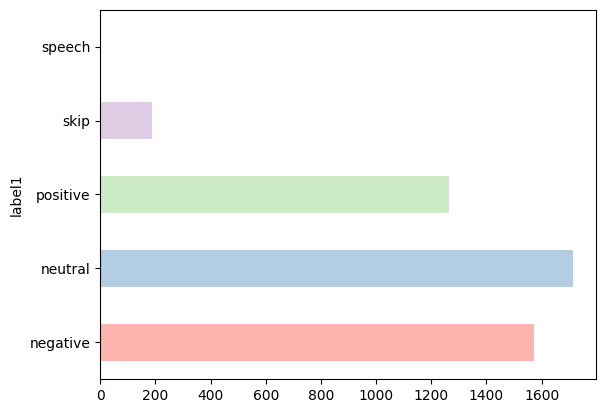

In [ ]:
# Визуализируем

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Pastel1'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
df.to_csv('byredo_SENT.csv', encoding='utf-8')


*Повторим предыдущие шаги с оставшимися сетами отзывов.*

**VILHELM PARFUMERIE REVIEWS**

In [67]:
#Создаем датафрейм из файла с отзывами.

df = pd.read_csv("vilhelm_all.csv")


In [68]:
# Выгружаем столбец с текстами отзывов в список, чтобы прогнать его через модуль dostoevsky
reviews = df['review body'].tolist()

In [69]:
# Проверим. Всё получилось.
print(reviews[0:2])
len(reviews)

['Получила свое сокровище. Спешу поделиться радостью , а может и предостеречь кого нибудь. Это что-то страшное наконец то со мной. Как только не пугают им на просторах интернета. Если суммировать все высказывания то это о прокуренном не первой свежести помещении, продавленных и протертых кожаных диванах. \nНо танки грязи не боятся . И я как всегда решила , что именно это мне и нужно. \nЧто он для меня? Запах кубинских сигар, помню их аромат с детства , солёная кожа после купания ,вечер на пляже.. Ну и куда же без сандала.\nНе чувствую инжир и памелу может немного цедру. \nНо мне тепло и уютно в нем.', 'В верхах и в сердце всё было хорошо. Не сказать, чтоб в базе стало плохо, но, просто вот, - сандал не моя тропинка в парфюмерии. Очень редко нравятся ароматы с явно ощутимой нотой сандала. Вот и здесь он стал камнем преткновения. Увы. Объективно же аромат достойный.']


2000

In [70]:
# Проводим сентимент-анализ. При этом сразу преобразуем полученные результаты в формат списка списков для удоства дальнейшей работы.

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(reviews, k=2)
list_results = []
for sentiment in results:
  sent_keys = list(sentiment.keys())
  sent_values = list(sentiment.values())
  list_results.append([sent_keys[0], sent_values[0], sent_keys[1], sent_values[1]])

In [71]:
# Результаты загружаем в отдельный датафрейм.
df_sent = pd.DataFrame(list_results, columns=['label1', 'value1', 'label2', 'value2'])
df_sent

,label1,value1,label2,value2
0,neutral,0.569863,negative,0.281416
1,negative,0.320831,neutral,0.206904
2,neutral,0.262852,skip,0.206904
3,negative,0.577505,neutral,0.191943
4,neutral,0.658428,negative,0.212079
...,...,...,...,...
1995,neutral,0.327678,positive,0.212079
1996,positive,0.422515,skip,0.191943
1997,positive,0.384922,neutral,0.187143
1998,neutral,0.685959,negative,0.182436


In [72]:
# Соединяем! Получаем итоговый датафрейм.

df = df.join(df_sent)
df

,Unnamed: 0,fragrance,date,user ID,review body,label1,value1,label2,value2
0,0,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,01/08/24 07:06,267213,Получила свое сокровище. Спешу поделиться радо...,neutral,0.569863,negative,0.281416
1,1,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,12/26/23 03:16,334246,В верхах и в сердце всё было хорошо. Не сказат...,negative,0.320831,neutral,0.206904
2,2,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/27/23 10:14,237585,Зеленый инжир и табак! Искала отголоски Pulp о...,neutral,0.262852,skip,0.206904
3,3,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/27/23 06:30,261690,Купила по пирамиде с русской фрагрантики. Боль...,negative,0.577505,neutral,0.191943
4,4,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/22/23 02:05,296565,"Я не знаю откуда здесь брали пирамиду, какой и...",neutral,0.658428,negative,0.212079
...,...,...,...,...,...,...,...,...,...
1995,1995,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,02/04/20 04:16,195039,"При первом же вздохе поняла, что это брат Серж...",neutral,0.327678,positive,0.212079
1996,1996,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,08/22/20 12:50,177386,"Восхитительно красивый, слегка ностальгический...",positive,0.422515,skip,0.191943
1997,1997,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,11/28/21 05:04,266684,Возможно по моим рецепторам проехался катом ко...,positive,0.384922,neutral,0.187143
1998,1998,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,01/19/19 08:23,51446,Маринованный имбирь и васабииз японской кухни ...,neutral,0.685959,negative,0.182436


In [73]:
del df['Unnamed: 0']

In [74]:
df

,fragrance,date,user ID,review body,label1,value1,label2,value2
0,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,01/08/24 07:06,267213,Получила свое сокровище. Спешу поделиться радо...,neutral,0.569863,negative,0.281416
1,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,12/26/23 03:16,334246,В верхах и в сердце всё было хорошо. Не сказат...,negative,0.320831,neutral,0.206904
2,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/27/23 10:14,237585,Зеленый инжир и табак! Искала отголоски Pulp о...,neutral,0.262852,skip,0.206904
3,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/27/23 06:30,261690,Купила по пирамиде с русской фрагрантики. Боль...,negative,0.577505,neutral,0.191943
4,Dirty Velvet Vilhelm Parfumerie для мужчин и ж...,08/22/23 02:05,296565,"Я не знаю откуда здесь брали пирамиду, какой и...",neutral,0.658428,negative,0.212079
...,...,...,...,...,...,...,...,...
1995,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,02/04/20 04:16,195039,"При первом же вздохе поняла, что это брат Серж...",neutral,0.327678,positive,0.212079
1996,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,08/22/20 12:50,177386,"Восхитительно красивый, слегка ностальгический...",positive,0.422515,skip,0.191943
1997,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,11/28/21 05:04,266684,Возможно по моим рецепторам проехался катом ко...,positive,0.384922,neutral,0.187143
1998,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,01/19/19 08:23,51446,Маринованный имбирь и васабииз японской кухни ...,neutral,0.685959,negative,0.182436


In [ ]:
# Подсчитываем количество для каждого тэга. Считаем по label1, т.к. это приоритетное значение, предложенное моделью.

df['label1'].value_counts()

neutral     792
negative    615
positive    517
skip         75
speech        1
Name: label1, dtype: int64

In [ ]:
# Получим проценты.

df['label1'].value_counts().apply(lambda x: x/2000*100)

neutral     39.60
negative    30.75
positive    25.85
skip         3.75
speech       0.05
Name: label1, dtype: float64

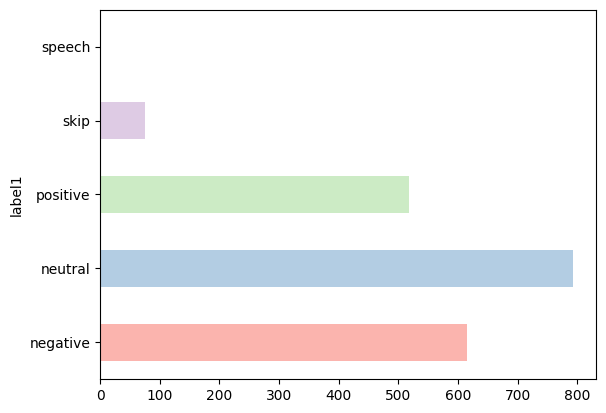

In [ ]:
# Визуализируем

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Pastel1'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
# Сохраним в файл.
df.to_csv('vilhelm_SENT.csv', encoding='utf-8')


**KILIAN REVIEWS**

In [ ]:
df = pd.read_csv("kilian_all.csv")

In [ ]:
reviews = df['review body'].tolist()

In [ ]:
print(reviews[0:2])
len(reviews)

['На мне уходит в мыло, в самое обычное цветочное мыло , не поняла я этих восторгов вокруг этой снятости..', 'Добыла в коллекцию этот красивущий белоцветочный аромат!🥳 Это невероятно шикарно обыгранный нероли и жасмин. Очень влажный аромат, как будто букет белых цветов после дождя. Моя любовь. Ничего похожего чтобы сравнить не знаю. И очень этому рада👌🏽']


7652

In [ ]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(reviews, k=2)
list_results = []
for sentiment in results:
  sent_keys = list(sentiment.keys())
  sent_values = list(sentiment.values())
  list_results.append([sent_keys[0], sent_values[0], sent_keys[1], sent_values[1]])

In [ ]:
df_sent = pd.DataFrame(list_results, columns=['label1', 'value1', 'label2', 'value2'])
df_sent

,label1,value1,label2,value2
0,neutral,0.585111,negative,0.177821
1,positive,0.718604,negative,0.156115
2,neutral,0.275140,positive,0.222710
3,neutral,0.341593,negative,0.281416
4,positive,0.562187,negative,0.233716
...,...,...,...,...
7647,positive,0.262852,negative,0.228166
7648,negative,0.281416,skip,0.233716
7649,positive,0.281416,negative,0.228166
7650,positive,0.268951,negative,0.201823


In [ ]:
df = df.join(df_sent)
df

,Unnamed: 0,fragrance,date,user ID,review body,label1,value1,label2,value2
0,0,Do It For Love By Kilian для мужчин и женщин,07/05/23 07:18,366958,"На мне уходит в мыло, в самое обычное цветочно...",neutral,0.585111,negative,0.177821
1,1,Do It For Love By Kilian для мужчин и женщин,03/20/23 08:46,39039,Добыла в коллекцию этот красивущий белоцветочн...,positive,0.718604,negative,0.156115
2,2,Do It For Love By Kilian для мужчин и женщин,08/03/22 12:14,223449,Шла вообще за другим :)\nОбычно к ароматам Кил...,neutral,0.275140,positive,0.222710
3,3,Do It For Love By Kilian для мужчин и женщин,12/07/21 06:06,284612,"Скажу честно, я очень не люблю отзывы, где пиш...",neutral,0.341593,negative,0.281416
4,4,Do It For Love By Kilian для мужчин и женщин,11/26/20 06:01,276743,"Пвродоксальный момент, но на мне он не дал цит...",positive,0.562187,negative,0.233716
...,...,...,...,...,...,...,...,...,...
7647,7647,"Sophie Matisse Art Edition Good Girl Gone Bad,...",08/23/16 11:40,192753,"Божественный аромат, самый женственный из Кили...",positive,0.262852,negative,0.228166
7648,7648,"Sophie Matisse Art Edition Good Girl Gone Bad,...",07/25/18 23:17,212942,"Скорее всего, этой девочке, когда-то наивной, ...",negative,0.281416,skip,0.233716
7649,7649,"Sophie Matisse Art Edition Good Girl Gone Bad,...",04/14/16 06:02,112765,"Однажды я познакомилась с первой ""девочкой"", с...",positive,0.281416,negative,0.228166
7650,7650,"Sophie Matisse Art Edition Good Girl Gone Bad,...",09/26/15 03:33,153168,Практически ни чем не отличается от классическ...,positive,0.268951,negative,0.201823


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,fragrance,date,user ID,review body,label1,value1,label2,value2
0,Do It For Love By Kilian для мужчин и женщин,07/05/23 07:18,366958,"На мне уходит в мыло, в самое обычное цветочно...",neutral,0.585111,negative,0.177821
1,Do It For Love By Kilian для мужчин и женщин,03/20/23 08:46,39039,Добыла в коллекцию этот красивущий белоцветочн...,positive,0.718604,negative,0.156115
2,Do It For Love By Kilian для мужчин и женщин,08/03/22 12:14,223449,Шла вообще за другим :)\nОбычно к ароматам Кил...,neutral,0.275140,positive,0.222710
3,Do It For Love By Kilian для мужчин и женщин,12/07/21 06:06,284612,"Скажу честно, я очень не люблю отзывы, где пиш...",neutral,0.341593,negative,0.281416
4,Do It For Love By Kilian для мужчин и женщин,11/26/20 06:01,276743,"Пвродоксальный момент, но на мне он не дал цит...",positive,0.562187,negative,0.233716
...,...,...,...,...,...,...,...,...
7647,"Sophie Matisse Art Edition Good Girl Gone Bad,...",08/23/16 11:40,192753,"Божественный аромат, самый женственный из Кили...",positive,0.262852,negative,0.228166
7648,"Sophie Matisse Art Edition Good Girl Gone Bad,...",07/25/18 23:17,212942,"Скорее всего, этой девочке, когда-то наивной, ...",negative,0.281416,skip,0.233716
7649,"Sophie Matisse Art Edition Good Girl Gone Bad,...",04/14/16 06:02,112765,"Однажды я познакомилась с первой ""девочкой"", с...",positive,0.281416,negative,0.228166
7650,"Sophie Matisse Art Edition Good Girl Gone Bad,...",09/26/15 03:33,153168,Практически ни чем не отличается от классическ...,positive,0.268951,negative,0.201823


In [ ]:
df['label1'].value_counts()

neutral     2637
negative    2413
positive    2267
skip         329
speech         6
Name: label1, dtype: int64

In [ ]:
df['label1'].value_counts().apply(lambda x: x/7652*100)

neutral     34.461579
negative    31.534239
positive    29.626242
skip         4.299530
speech       0.078411
Name: label1, dtype: float64

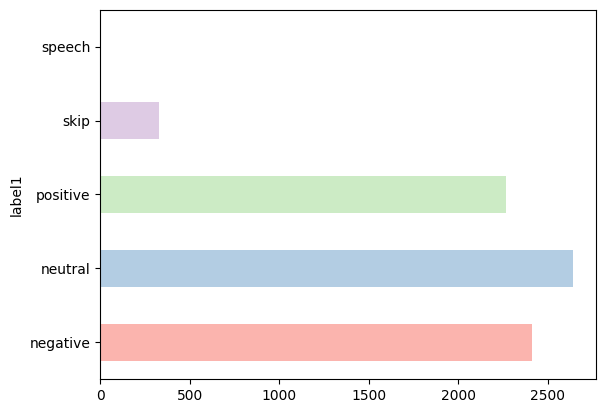

In [ ]:
# Визуализируем

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Pastel1'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
df.to_csv('kilian_SENT.csv', encoding='utf-8')

**ALL REVIEWS**

In [ ]:
#Создаем датафрейм из файла с отзывами.

df = pd.read_csv("FRAG_all.csv")


In [ ]:
# Выгружаем столбец с текстами отзывов в список, чтобы прогнать его через модуль dostoevsky
reviews = df['review body'].tolist()

In [ ]:
# Проверим. Всё получилось.
print(reviews[104])
len(reviews)

Красавица-тубероза купается в сливках!) И она чудесная! Юная нежная тубероза, но более лакомая, томная. Мягкость и бархатистость этого аромата напоминают дорогие ткани с Востока. О, рахат-лукум моего сердца, Килиан!!!, что же ты делаешь)). Яркость и чувственная томность этой туберозы обворожила меня. Раскрытие и высокая стойкость очень радуют. Нежность и загадочная притягательность сплелись в этом аромате. Здесь красотка-тубероза не выпускает свои острые коготки, она мила и приветлива. В этом ее хитрость, ее тайна...)


14391

In [ ]:
# Проводим сентимент-анализ.
# При этом сразу преобразуем полученные результаты в формат списка списков для удобства дальнейшей работы.

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(reviews, k=2)
list_results = []
for sentiment in results:
  sent_keys = list(sentiment.keys())
  sent_values = list(sentiment.values())
  list_results.append([sent_keys[0], sent_values[0], sent_keys[1], sent_values[1]])

In [ ]:
# Результаты загружаем в отдельный датафрейм.
df_sent = pd.DataFrame(list_results, columns=['label1', 'value1', 'label2', 'value2'])
df_sent

,label1,value1,label2,value2
0,neutral,0.585111,negative,0.177821
1,positive,0.718604,negative,0.156115
2,neutral,0.275140,positive,0.222710
3,neutral,0.341593,negative,0.281416
4,positive,0.562187,negative,0.233716
...,...,...,...,...
14386,neutral,0.327678,positive,0.212079
14387,positive,0.422515,skip,0.191943
14388,positive,0.384922,neutral,0.187143
14389,neutral,0.685959,negative,0.182436


In [ ]:
# Соединяем! Получаем итоговый датафрейм.

df = df.join(df_sent)
df

,Unnamed: 0,fragrance,date,user ID,review body,label1,value1,label2,value2
0,0,Do It For Love By Kilian для мужчин и женщин,07/05/23 07:18,366958,"На мне уходит в мыло, в самое обычное цветочно...",neutral,0.585111,negative,0.177821
1,1,Do It For Love By Kilian для мужчин и женщин,03/20/23 08:46,39039,Добыла в коллекцию этот красивущий белоцветочн...,positive,0.718604,negative,0.156115
2,2,Do It For Love By Kilian для мужчин и женщин,08/03/22 12:14,223449,Шла вообще за другим :)\nОбычно к ароматам Кил...,neutral,0.275140,positive,0.222710
3,3,Do It For Love By Kilian для мужчин и женщин,12/07/21 06:06,284612,"Скажу честно, я очень не люблю отзывы, где пиш...",neutral,0.341593,negative,0.281416
4,4,Do It For Love By Kilian для мужчин и женщин,11/26/20 06:01,276743,"Пвродоксальный момент, но на мне он не дал цит...",positive,0.562187,negative,0.233716
...,...,...,...,...,...,...,...,...,...
14386,14386,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,02/04/20 04:16,195039,"При первом же вздохе поняла, что это брат Серж...",neutral,0.327678,positive,0.212079
14387,14387,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,08/22/20 12:50,177386,"Восхитительно красивый, слегка ностальгический...",positive,0.422515,skip,0.191943
14388,14388,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,11/28/21 05:04,266684,Возможно по моим рецепторам проехался катом ко...,positive,0.384922,neutral,0.187143
14389,14389,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,01/19/19 08:23,51446,Маринованный имбирь и васабииз японской кухни ...,neutral,0.685959,negative,0.182436


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,fragrance,date,user ID,review body,label1,value1,label2,value2
0,Do It For Love By Kilian для мужчин и женщин,07/05/23 07:18,366958,"На мне уходит в мыло, в самое обычное цветочно...",neutral,0.585111,negative,0.177821
1,Do It For Love By Kilian для мужчин и женщин,03/20/23 08:46,39039,Добыла в коллекцию этот красивущий белоцветочн...,positive,0.718604,negative,0.156115
2,Do It For Love By Kilian для мужчин и женщин,08/03/22 12:14,223449,Шла вообще за другим :)\nОбычно к ароматам Кил...,neutral,0.275140,positive,0.222710
3,Do It For Love By Kilian для мужчин и женщин,12/07/21 06:06,284612,"Скажу честно, я очень не люблю отзывы, где пиш...",neutral,0.341593,negative,0.281416
4,Do It For Love By Kilian для мужчин и женщин,11/26/20 06:01,276743,"Пвродоксальный момент, но на мне он не дал цит...",positive,0.562187,negative,0.233716
...,...,...,...,...,...,...,...,...
14386,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,02/04/20 04:16,195039,"При первом же вздохе поняла, что это брат Серж...",neutral,0.327678,positive,0.212079
14387,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,08/22/20 12:50,177386,"Восхитительно красивый, слегка ностальгический...",positive,0.422515,skip,0.191943
14388,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,11/28/21 05:04,266684,Возможно по моим рецепторам проехался катом ко...,positive,0.384922,neutral,0.187143
14389,Stockholm 1978 Vilhelm Parfumerie для мужчин и...,01/19/19 08:23,51446,Маринованный имбирь и васабииз японской кухни ...,neutral,0.685959,negative,0.182436


In [ ]:
# Подсчитываем количество для каждого тэга. Считаем по label1, т.к. это приоритетное значение, предложенное моделью.

df['label1'].value_counts()

neutral     5141
negative    4600
positive    4048
skip         593
speech         9
Name: label1, dtype: int64

In [ ]:
# Получим проценты.

df['label1'].value_counts().apply(lambda x: x/14391*100)

neutral     35.723716
negative    31.964422
positive    28.128692
skip         4.120631
speech       0.062539
Name: label1, dtype: float64

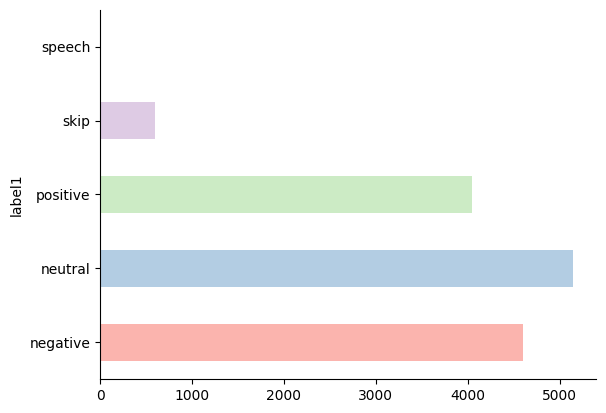

In [ ]:
# Визуализируем.

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Pastel1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Сохраним в файл.
df.to_csv('FRAG_SENT.csv', encoding='utf-8')
